In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pyLDAvis
import pyLDAvis.sklearn
from textblob import TextBlob
from matplotlib import pyplot as plt
from wordcloud import WordCloud

C:\Users\tyler\Miniconda3\envs\metis\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\tyler\Miniconda3\envs\metis\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, defaultdict


In [3]:
pca = pd.DataFrame(pd.read_pickle('c:/users/tyler/desktop/reduced_X.pkl'))
print(pca)

              0         1
0     -0.012916  0.013844
1     -0.012916  0.013844
2      0.330457  0.013844
3     -0.012916  0.013844
4     -0.012916  0.013844
...         ...       ...
47381 -0.012916  0.013844
47382 -0.012916  0.013844
47383 -0.012916  0.013844
47384 -0.012916  0.013844
47385 -0.012916  0.013844

[47386 rows x 2 columns]


In [4]:
texts = pd.DataFrame(pd.read_pickle('c:/users/tyler/desktop/texts_docs.pkl'))
len(texts)

47386

In [5]:
LSA_topics = pd.DataFrame(pd.read_pickle('c:/users/tyler/desktop/LSA_topics.pkl'))
# LSA_topics.reset_index(drop=True, inplace=True)

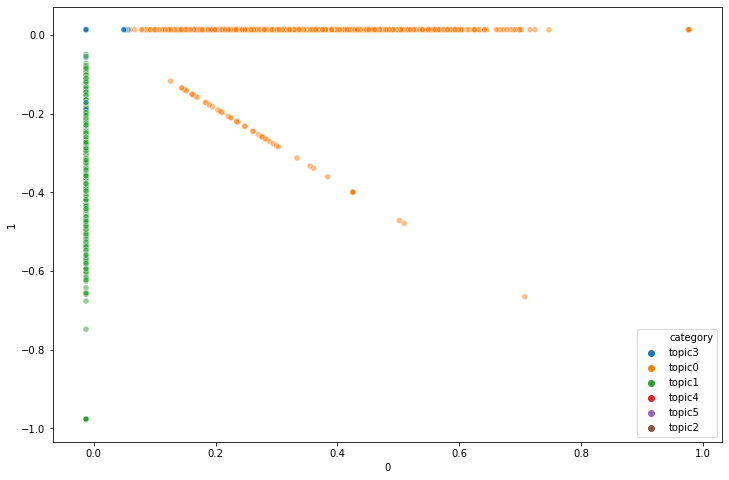

In [7]:
x = pca[0]
y = pca[1]
hue = LSA_topics['category']
plt.figure(figsize=(12,8))
fg = sns.scatterplot(x, y, hue=hue, alpha=0.5);

## pyLDAviz!
Next time...

In [8]:
# vectorizer = TfidfVectorizer(ngram_range=(1, 2))
# data_vectorized = vectorizer.fit_transform(texts.tokenize_text)

In [9]:
# lda_model = LatentDirichletAllocation(n_components=4)

In [10]:
# lda_output = lda_model.fit_transform(data_vectorized)

In [11]:
# pyLDAvis.enable_notebook()
# pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

## Sentiment Analysis

In [12]:
df = pd.DataFrame(pd.read_pickle('c:/users/tyler/desktop/texts_docs.pkl'))

In [13]:
data = pd.DataFrame(df)
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data['polarity'] = data['tokenize_text'].apply(pol)
data['subjectivity'] = data['tokenize_text'].apply(sub)

In [14]:
print(str([row for row in data[data['polarity'] > 0.9]['text']]).replace(',', '\n'))

['best burrito ever'
 'awesome'
 'i m asserting myself into conversations and i don t give a damn  it s awesome '
 'perfect  i am in the car  and on    '
 'whoa  awesome  who s he playing for  '
 'awesome  '
 'perfect  '
 'perfect way for me to market my follow up product'
 'awesome '
 'you re in an awesome museum '
 'you re the ducking best  '
 'perfect   thank you  '
 'when did you want to talk about practice  i m thinking about how do we best utilize our       people at regionals'
 'perfect  i m almost home '
 'oooh that would perfect'
 'or   rooms and saturday night only is perfect'
 'yes i think that s the way to go    rooms saturday night only is perfect  or   rooms only and i can bring air mattress'
 'awesome  '
 'that s awesome tho  '
 'and yeah i m just gunna try and fix the issue as best i can and move forward'
 'but it would be awesome if you came to watch   and yes let s go on walkies  i ll come to sales force park '
 'perfect '
 'perfect '
 'awesome  '
 'awesome'
 'thanks 

Text(0, 0.5, 'Fact | Opinion')

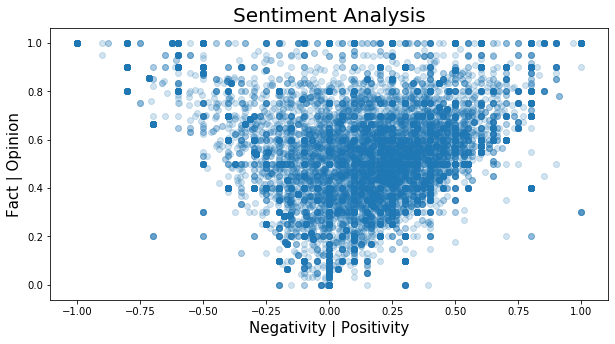

In [15]:
plt.figure(figsize=(10,5))
x = data.polarity
y = data.subjectivity


plt.scatter(x, y, alpha=0.2)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Negativity | Positivity', fontsize=15)
plt.ylabel('Fact | Opinion', fontsize=15)

In [16]:
data.to_csv('c:/users/tyler/desktop/text_sentiment.csv')

## Word Cloud

In [17]:
LSA_topics[LSA_topics['category']=='topic0']

,tokenize_text,category
2,tonight right lol,topic0
8,p,topic0
16,lol want meet,topic0
17,be,topic0
18,do,topic0
...,...,...
47349,,topic0
47350,t tryna passive aggressive crew,topic0
47372,bore bath,topic0
47379,gre,topic0


Topic: topic3
Topic: topic0
Topic: topic1
Topic: topic4
Topic: topic5
Topic: topic2


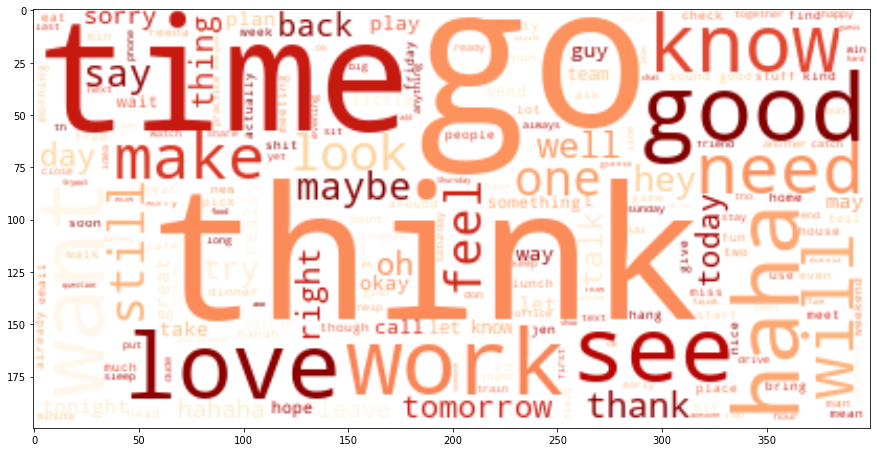

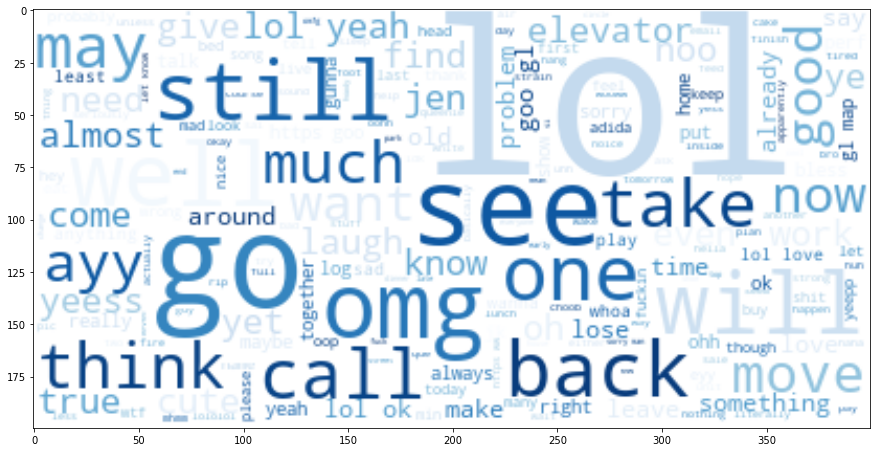

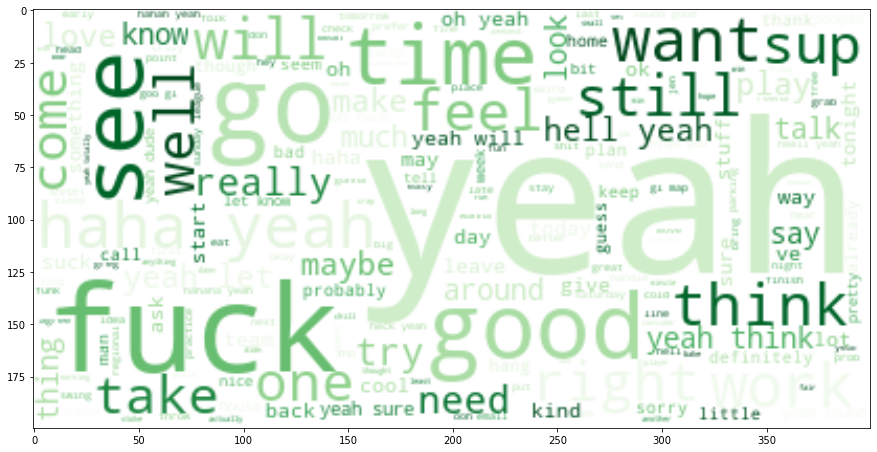

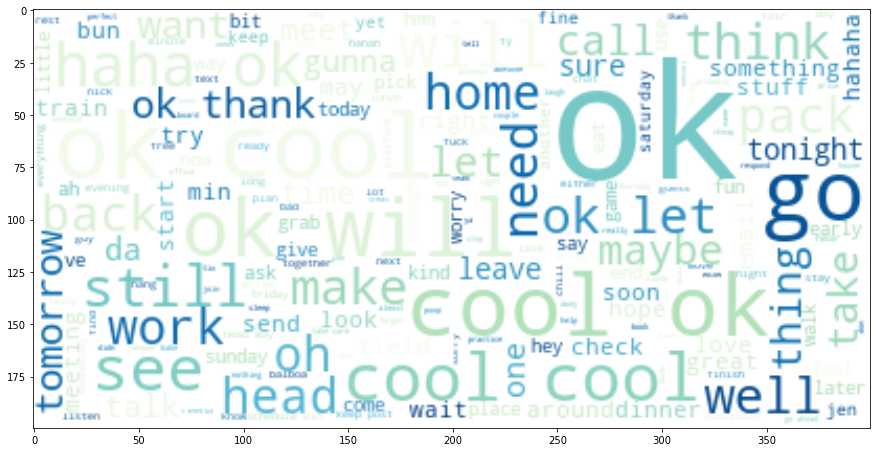

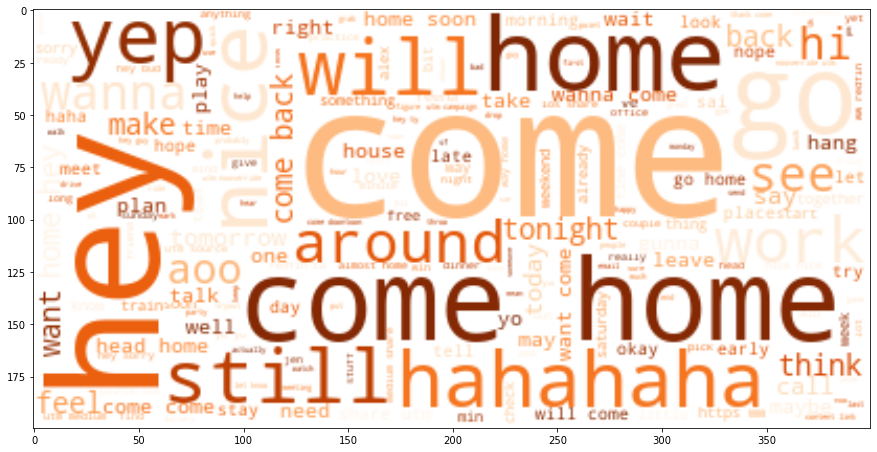

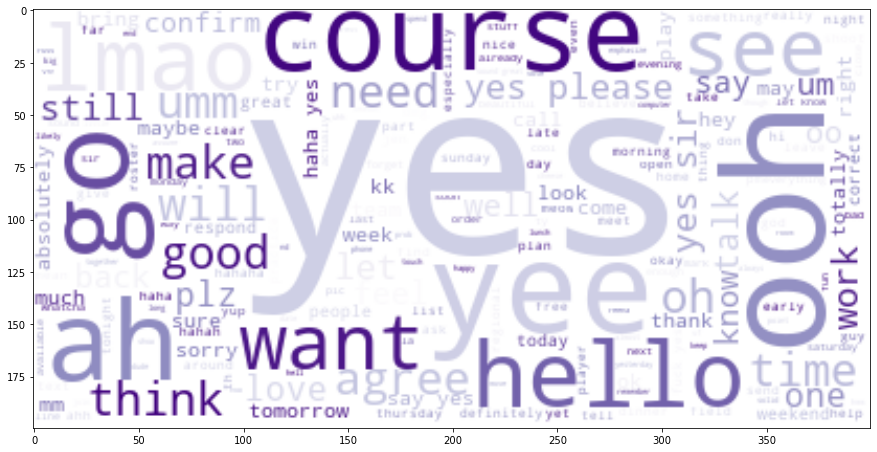

In [18]:
def generate_word_cloud(data, column, value, color):
    wc = WordCloud(background_color='white', colormap=color)
    data = data[data['category']==value][column] # get desired data where in specified column
    all_texts = [text for text in data]
    all_texts = ' '.join(all_texts)

    cloud_texts = wc.generate(all_texts)

    plt.figure(figsize=(15, 20))
    plt.imshow(cloud_texts, interpolation='bilinear')
    print('Topic:', value)
    plt.show;

topics = LSA_topics['category'].unique()
colors = ['OrRd', 'Blues', 'Greens', 'GnBu', 'Oranges', 'Purples']
for idx, topic in enumerate(topics):
    generate_word_cloud(LSA_topics, 'tokenize_text', topic, colors[idx])

## Text Generator

In [19]:
texts = pd.DataFrame(pd.read_pickle('c:/users/tyler/desktop/texts_simple_lower.pkl'))

In [20]:
texts

,text
0,sup dog
1,hang some time sunday
2,or tonight right now lol
3,sunday should work in la tonight
4,hot dog enjoy the angels
...,...
50756,just calling to catch up call when you can l...
50757,i should be home around fyi if that has a...
50758,i don t expect you to wait for me and if for s...
50759,sounds good i went ahead and ate a little bit...


In [21]:
# Input code here
from collections import defaultdict

text_dict = defaultdict(list)
for text in texts['text']:
    # get word and following word
    text = text.split(' ')
    length = len(text)
    for i in range(length):
        if i != length-1:
            text_dict[text[i]] += [text[i+1]]
        else:
            text_dict[text[i]] += '|'

In [22]:
# Input code here
import random

def textGenerate(dictionary, num_words, starting_word=''):
    if starting_word == '':
        string = random.choice(list(dictionary))
    else:
        string = starting_word
    current_word = starting_word
    while num_words > 0:
        if dictionary[current_word] == []:
            current_word = random.choice(['and', 'also', 'but', 'so', 'then', 'if'])
        else:
            current_word = random.choice(dictionary[current_word])
        
        string = string + ' ' + current_word
        num_words -= 1
    print(string.capitalize() + '.')

In [23]:
textGenerate(text_dict, 7, 'hmm')

Hmm alright looks worse for you want me.
